In [20]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import zarr
from zarr.storage import DirectoryStore
from tqdm import tqdm
from skimage.io import imread
from glob import glob

## 2/20

In [3]:
path_to_seg = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2024_02_20_dpt-gfp_ca-Gal4_UAS-His-RFP_halocarbon_5x_timeseries/larva_2/segmentation.zarr'
path_to_ims = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2024_02_20_dpt-gfp_ca-Gal4_UAS-His-RFP_halocarbon_5x_timeseries/larva_2/im.ome.zarr/0'
channel = 0


In [4]:
seg = zarr.open(path_to_seg, 'r')
ims = zarr.open(path_to_ims, 'r')

In [5]:
total_inten = np.zeros(ims.shape[0])
for t in tqdm(range(ims.shape[0])):
    this_im = cp.asarray(ims[t, channel])
    this_seg = cp.asarray(seg[t])
    
    this_im = this_im * (this_seg > 0)
    
    total_inten[t] = cp.sum(this_im).get()

del(this_im)
del(this_seg)
cp._default_memory_pool.free_all_blocks()

100%|███████████████████████████████████████████| 90/90 [01:00<00:00,  1.50it/s]


Text(0, 0.5, 'total dpt-gfp intensity (a.u.)')

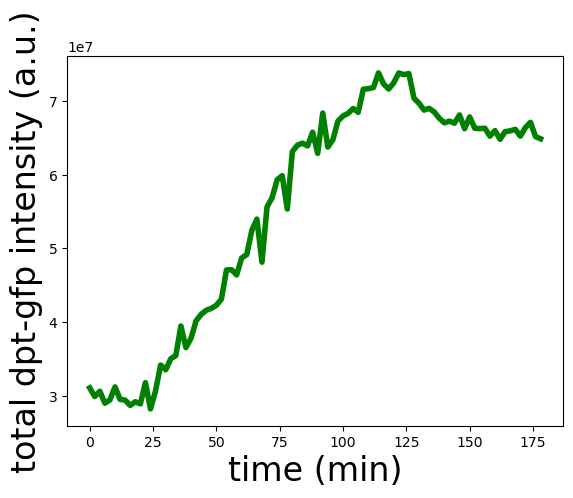

In [8]:
t_arr = 2 * np.arange(len(total_inten))
plt.figure()
plt.plot(t_arr, total_inten, 'g-', linewidth=4)
plt.xlabel('time (min)', fontsize=24)
plt.ylabel('total dpt-gfp intensity (a.u.)', fontsize=24)

### simple mip quantification

In [35]:
mip_dir = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2024_02_20_dpt-gfp_ca-Gal4_UAS-His-RFP_halocarbon_5x_timeseries/larva_2/mips'
prefix = 'mip_green_'
suffix = '.tif'
files = glob(mip_dir + '/' + prefix + '*' + suffix)

In [36]:
mip_inten_arr = np.zeros(len(files))
green_thresh = 300
for i in tqdm(range(len(files))):
    this_im = imread(mip_dir + '/' + prefix + str(i) + suffix)
    mip_inten_arr[i] = np.sum(this_im[this_im > green_thresh])

100%|██████████████████████████████████████████| 90/90 [00:00<00:00, 321.60it/s]


Text(0, 0.5, 'total mip dpt-gfp intensity (a.u.)')

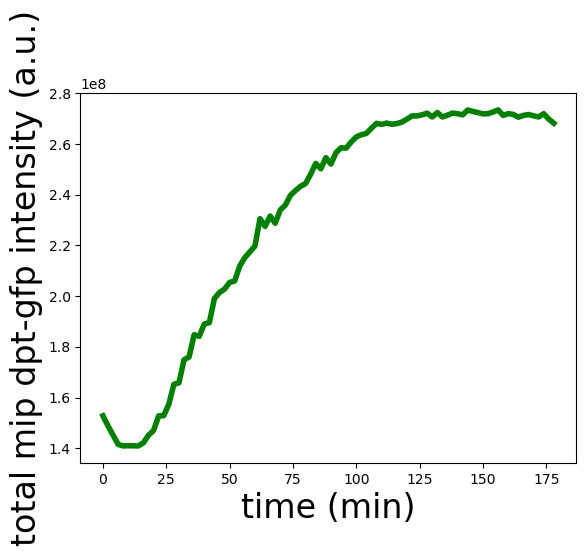

In [37]:
t_arr = 2 * np.arange(len(mip_inten_arr))
plt.figure()
plt.plot(t_arr, mip_inten_arr, 'g-', linewidth=4)
plt.xlabel('time (min)', fontsize=24)
plt.ylabel('total mip dpt-gfp intensity (a.u.)', fontsize=24)

## 2/14

In [13]:
path_to_seg = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2024_02_14_dpt-gfp_ca-Gal4_UAS-His-RFP_halocarbon_5x_timeseries/larva_2/segmentation.zarr'
path_to_ims = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2024_02_14_dpt-gfp_ca-Gal4_UAS-His-RFP_halocarbon_5x_timeseries/larva_2/im.ome.zarr/0'
channel = 0

seg = zarr.open(path_to_seg, 'r')
ims = zarr.open(path_to_ims, 'r')

In [15]:
total_inten = np.zeros(seg.shape[0])
for t in tqdm(range(seg.shape[0])):
    this_im = cp.asarray(ims[t, channel])
    this_seg = cp.asarray(seg[t])
    
    this_im = this_im * (this_seg > 0)
    
    total_inten[t] = cp.sum(this_im).get()

del(this_im)
del(this_seg)
cp._default_memory_pool.free_all_blocks()

100%|███████████████████████████████████████████| 37/37 [03:39<00:00,  5.92s/it]


Text(0, 0.5, 'total dpt-gfp intensity (a.u.)')

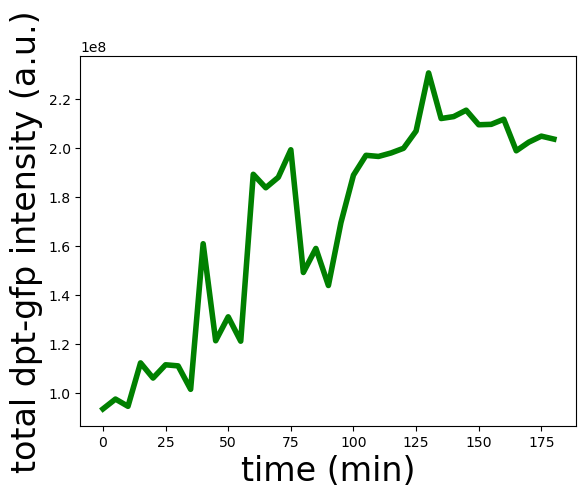

In [16]:
t_arr = 5 * np.arange(len(total_inten))
plt.figure()
plt.plot(t_arr, total_inten, 'g-', linewidth=4)
plt.xlabel('time (min)', fontsize=24)
plt.ylabel('total dpt-gfp intensity (a.u.)', fontsize=24)

### simple mip quantification

In [40]:
mip_dir = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2024_02_14_dpt-gfp_ca-Gal4_UAS-His-RFP_halocarbon_5x_timeseries/larva_2/mips'
prefix = 'mip_green_'
suffix = '.tif'
files = glob(mip_dir + '/' + prefix + '*' + suffix)

In [41]:
mip_inten_arr = np.zeros(len(files))
green_thresh = 300
for i in tqdm(range(len(files))):
    this_im = imread(mip_dir + '/' + prefix + str(i) + suffix)
    mip_inten_arr[i] = np.sum(this_im[this_im > green_thresh])

100%|███████████████████████████████████████████| 96/96 [00:03<00:00, 30.55it/s]


(-5.0, 180.0)

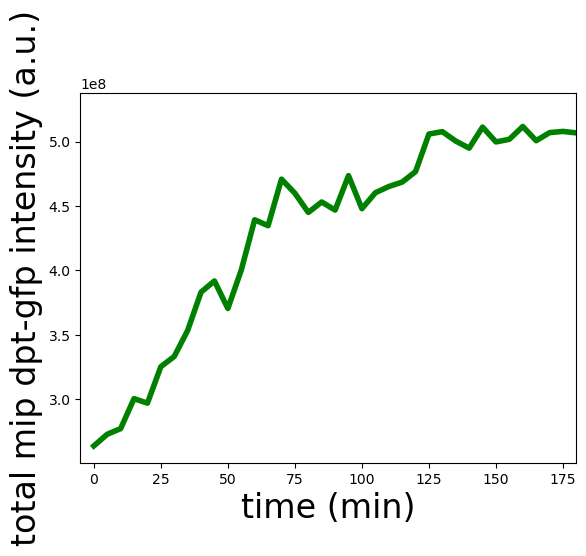

In [45]:
t_arr = 5 * np.arange(len(mip_inten_arr))
plt.figure()
plt.plot(t_arr, mip_inten_arr, 'g-', linewidth=4)
plt.xlabel('time (min)', fontsize=24)
plt.ylabel('total mip dpt-gfp intensity (a.u.)', fontsize=24)
plt.xlim(-5, 36 * 5)

## 3/7/32

In [56]:
mip_dir = r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2023_03_07-dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_modified_earlyL3_timeseries/larvae_2/mips'
prefix = 'mip_green_'
prefix_red = 'mip_red_'
suffix = '.tif'
files = glob(mip_dir + '/' + prefix + '*' + suffix)

In [57]:
mip_inten_arr = np.zeros(len(files))
green_thresh = 400
red_thresh = 2240
for i in tqdm(range(len(files))):
    this_im = imread(mip_dir + '/' + prefix + str(i) + suffix)
    this_mask = imread(mip_dir + '/' + prefix_red + str(i) + suffix) > red_thresh
    this_im = this_im * this_mask
    mip_inten_arr[i] = np.sum(this_im[this_im > green_thresh])

100%|███████████████████████████████████████████| 30/30 [00:23<00:00,  1.30it/s]


Text(0, 0.5, 'total mip dpt-gfp intensity (a.u.)')

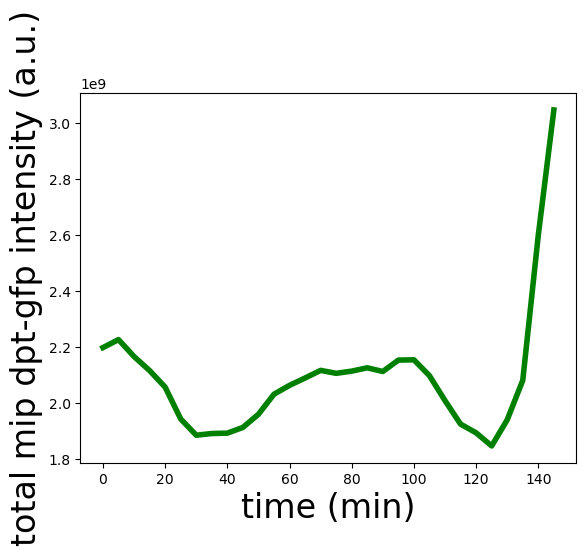

In [58]:
t_arr = 5 * np.arange(len(mip_inten_arr))
plt.figure()
plt.plot(t_arr, mip_inten_arr, 'g-', linewidth=4)
plt.xlabel('time (min)', fontsize=24)
plt.ylabel('total mip dpt-gfp intensity (a.u.)', fontsize=24)


In [53]:
im = imread(r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2023_03_07-dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_modified_earlyL3_timeseries/larvae_2/mips/mip_green_29.tif')
red = imread(r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2023_03_07-dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_modified_earlyL3_timeseries/larvae_2/mips/mip_red_29.tif')

In [54]:
mask = red > 2240
im = im * mask

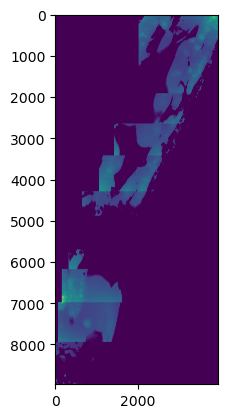

In [55]:
plt.figure()
plt.imshow(im)
